# Exploratory data analysis for autompg dataset

In [15]:
# Boiler plate

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 150) # wide windows

import os
figdir = "../figures"
def save_fig(fname):
    if figdir:
        plt.savefig(os.path.join(figdir, fname))


In [16]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# We made a cached copy since UCI repository is often down
#url = 'https://raw.githubusercontent.com/probml/pyprobml/master/data/mpg.csv'
#column_names = ['mpg','cylinders','displacement','horsepower','weight',
#                'acceleration', 'model_year', 'origin', 'name'] 
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Year            398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


We notice that there are only 392 horsepower rows, but 398 of the others.
This is because the HP column has 6 missing values (also called NA, or
not available).
There are 3 main ways to deal with this:
- Drop the rows with any missing values using dropna()
- Drop any columns with any missing values using drop()
- Replace the missing vales with some other valye (eg the median) using fillna. (This is called missing value imputation.)
For simplicity, we adopt the first approach.


In [17]:
# Ensure same number of rows for all features.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [24]:
# Summary statistics
df.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,NaN
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,NaN
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,NaN
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,NaN
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,NaN
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,NaN


In [18]:
# Origin is categorical (1=USA, 2=Europe, 3=Japan)
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df['Origin'] = df['Origin'].astype('category')

# Let us check the categories
df['Origin'].cat.categories 

Index(['Europe', 'Japan', 'USA'], dtype='object')

In [6]:
# Let us check the datatypes
print(df.dtypes)

MPG              float64
Cylinders          int64
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Year               int64
Origin          category
dtype: object


In [21]:
# Let us inspect the data. We see meaningful names for Origin.
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [22]:
# Create latex table from first 5 rows 
str = df[-5:].to_latex(index=False, escape=False)
print(str)

\begin{tabular}{rrrrrrrl}
\toprule
  MPG &  Cylinders &  Displacement &  Horsepower &  Weight &  Acceleration &  Year &  Origin \\
\midrule
 27.0 &          4 &         140.0 &        86.0 &  2790.0 &          15.6 &    82 &     USA \\
 44.0 &          4 &          97.0 &        52.0 &  2130.0 &          24.6 &    82 &  Europe \\
 32.0 &          4 &         135.0 &        84.0 &  2295.0 &          11.6 &    82 &     USA \\
 28.0 &          4 &         120.0 &        79.0 &  2625.0 &          18.6 &    82 &     USA \\
 31.0 &          4 &         119.0 &        82.0 &  2720.0 &          19.4 &    82 &     USA \\
\bottomrule
\end{tabular}



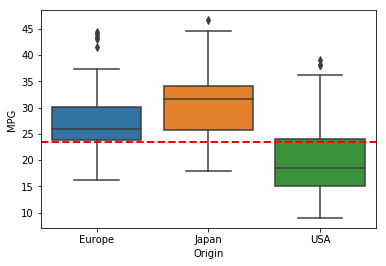

In [8]:
# Plot mpg distribution for cars from different countries of origin
data = pd.concat( [df['MPG'], df['Origin']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Origin', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
plt.savefig(os.path.join(figdir, 'auto-mpg-origin-boxplot.pdf'))
plt.show()

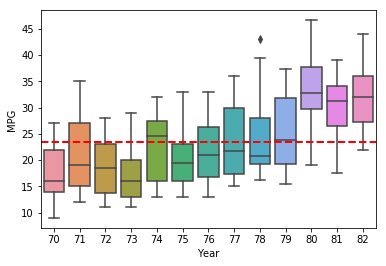

In [9]:
# Plot mpg distribution for cars from different years
data = pd.concat( [df['MPG'], df['Year']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Year', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
plt.savefig(os.path.join(figdir, 'auto-mpg-year-boxplot.pdf'))
plt.show()